# Coffe Shop Sales

O dataset escolhido para este trabalho cont√©m informa√ß√µes de transa√ß√µes referente √† uma cafeteria 
ficticia que opera em tr√™s locais de Nova York.

Dispon√≠vel em: https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales

## Caracter√≠stiscas do Dataset

Vamos ver a descri√ß√£o de cada propriedade do dataset:

- <b>transaction_id</b> : ID sequencial exclusivo que representa uma transa√ß√£o individual

- <b>transaction_date</b> : Data da transa√ß√£o (MM/DD/AA)

- <b>transaction_time</b> : Carimbo de data/hora da transa√ß√£o (HH:MM:SS)

- <b>transaction_qty</b> : Quantidade de itens vendidos

- <b>store_id</b> : ID exclusivo da cafeteria onde a transa√ß√£o ocorreu

- <b>store_location</b> : Localiza√ß√£o da cafeteria onde a transa√ß√£o ocorreu

- <b>product_id</b> : ID exclusivo do produto vendido

- <b>unit_price</b> : Pre√ßo de varejo do produto vendido

- <b>product_category</b> : Descri√ß√£o da categoria do produto

- <b>product_type</b> : Descri√ß√£o do tipo de produto

- <b>product_detail</b> : Descri√ß√£o dos detalhes do produto



#### Fazendo download do dataset

In [1]:
#https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales
# import kagglehub

# # Defina o caminho onde deseja salvar o dataset
# destination_path = "/home/kelvin/"  # Altere para o caminho desejado

# # Baixe o dataset na pasta especificada
# path = kagglehub.dataset_download("ahmedabbas757/coffee-sales")

# print("Path to dataset files:", path)


### Interpretando o dataset

In [2]:
import pandas as pd
dataframe = pd.read_excel("Coffee Shop Sales.xlsx")

In [3]:
dataframe.head()

transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg  
1        Brewed Chai tea     Spicy Eye Opener Chai Lg  
2          Hot chocolate            Dark chocolate Lg  
3            Drip coffee  Our Old Time Diner Blend Sm  
4        Brewed Chai tea     Spicy Eye Opener Chai Lg

In [4]:
print(dataframe.shape)

(149116, 11)


### Tamanho do dataset

149116 registros e 11 colunas

### Vamos ver agora a propor√ß√£o de cada Classe

In [5]:
columns = dataframe.columns.to_list()
for col in columns:
    print(dataframe[col].value_counts(normalize=True) * 100)
    print("-----------")

transaction_id
149456    0.000671
1         0.000671
2         0.000671
3         0.000671
4         0.000671
            ...   
32        0.000671
33        0.000671
34        0.000671
35        0.000671
36        0.000671
Name: proportion, Length: 149116, dtype: float64
-----------
transaction_date
2023-06-19    0.900641
2023-06-16    0.892594
2023-06-18    0.865098
2023-06-13    0.859063
2023-06-27    0.856380
                ...   
2023-02-06    0.327933
2023-01-30    0.322568
2023-01-28    0.315191
2023-01-31    0.309826
2023-01-29    0.307814
Name: proportion, Length: 181, dtype: float64
-----------
transaction_time
09:31:15    0.027495
08:15:41    0.026825
08:19:08    0.025484
11:40:03    0.024142
10:11:25    0.024142
              ...   
14:21:29    0.000671
14:37:47    0.000671
16:49:24    0.000671
17:07:57    0.000671
12:48:24    0.000671
Name: proportion, Length: 25762, dtype: float64
-----------
transaction_qty
1    58.450468
2    39.326430
3     2.198959
4     0.015424
8  

Destaque especial para a classe transaction_qty.

### Onde h√° valores nulos?

In [6]:
print(dataframe.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


### Normaliza√ß√£o dos dados

In [7]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Tratando as datas
dataframe["transaction_date"] = pd.to_datetime(dataframe["transaction_date"])
dataframe["Year"] = dataframe["transaction_date"].dt.year
dataframe["Month"] = dataframe["transaction_date"].dt.month
dataframe["Day"] = dataframe["transaction_date"].dt.day
dataframe.drop(columns=["transaction_date"], inplace=True)

# Tratando os hor√°rios para o formato c√≠clico (Seno/Cosseno)
dataframe["transaction_time"] = pd.to_datetime(dataframe["transaction_time"], format="%H:%M:%S")
dataframe["hour"] = dataframe["transaction_time"].dt.hour
dataframe["sin_hour"] = np.sin(2 * np.pi * dataframe["hour"] / 24)
dataframe["cos_hour"] = np.cos(2 * np.pi * dataframe["hour"] / 24)

#Dropando as colunas auxiliares / descartaveis de horas
# dataframe.drop(columns=["transaction_time", "hour"], inplace=True)


# Criando um label (ID) para os valores em string
label_encoder = LabelEncoder()
dataframe["store_location"] = label_encoder.fit_transform(dataframe["store_location"])
dataframe["product_category"] = label_encoder.fit_transform(dataframe["product_category"])
dataframe["product_type"] = label_encoder.fit_transform(dataframe["product_type"])
dataframe["product_detail"] = label_encoder.fit_transform(dataframe["product_detail"])

In [8]:
dataframe.head()

transaction_id    transaction_time  transaction_qty  store_id  \
0               1 1900-01-01 07:06:11                2         5   
1               2 1900-01-01 07:08:56                2         5   
2               3 1900-01-01 07:14:04                2         5   
3               4 1900-01-01 07:20:24                1         5   
4               5 1900-01-01 07:22:41                2         5   

   store_location  product_id  unit_price  product_category  product_type  \
0               2          32         3.0                 2            13   
1               2          57         3.1                 8             4   
2               2          59         4.5                 4            17   
3               2          22         2.0                 2            10   
4               2          57         3.1                 8             4   

   product_detail  Year  Month  Day  hour  sin_hour  cos_hour  
0              32  2023      1    1     7  0.965926 -0.258819  
1              71  2023      1    1     7  0.965926 -0.258819  
2              20  2023      1    1     7  0.965926 -0.258819  
3              60  2023      1    1     7  0.965926 -0.258819  
4              71  2023      1    1     7  0.965926 -0.258819

### O que vamos tentar prever?

Poss√≠veis problemas:

- Existe um padr√£o de hor√°rio e quantidade de vendas em certas lojas?
- H√° lojas ou produtos que t√™m padr√µes de vendas incomuns (outliers)?
- Os clientes seguem padr√µes de compras baseados em pre√ßo e quantidade?
- H√° algum padr√£o nas transa√ß√µes?
- Existe um grupo de produtos frequentemente comprados juntos?


## Identificando Padr√µes
### Verificando os diferentes grupos de transa√ß√µes
Dado a categoria do produto, o tipo de produto, o pre√ßo unit√°rio e a quantidade vendida, quais tipos de transa√ß√µes podemos identificar?

#### Padronizando os dados

In [9]:
from sklearn.preprocessing import StandardScaler

# Colunas a serem estudadas
features = ["product_category", "product_type", "unit_price", "transaction_qty"]
X = dataframe[features]

# Padronizando os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

#### KMEANS

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 2], dtype=int32)

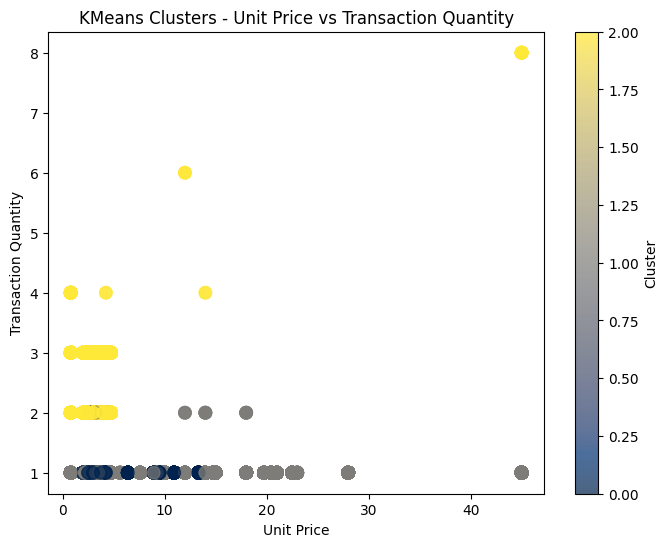

In [11]:
plt.figure(figsize=(8, 6))
# Selecionando duas colunas para plotar: unit_price e transaction_qty
scatter = plt.scatter(
  dataframe["unit_price"], 
  dataframe["transaction_qty"], 
  c=kmeans.labels_, 
  cmap='cividis', 
  s=80,
  alpha=0.7
)

plt.xlabel('Unit Price')
plt.ylabel('Transaction Quantity')
plt.title('KMeans Clusters - Unit Price vs Transaction Quantity')
plt.colorbar(scatter, label='Cluster')
plt.show()

Podemos observar no gr√°fico alguns outliers, como por exemplo uma transa√ß√£o de um produto com um valor alto em alta quantidade, o que n√£o √© comum!

### DBSCAN

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=5)
clusters_dsbcan = dbscan.fit_predict(data_scaled)
unique_clusters = np.unique(clusters_dsbcan)
len(unique_clusters)

115

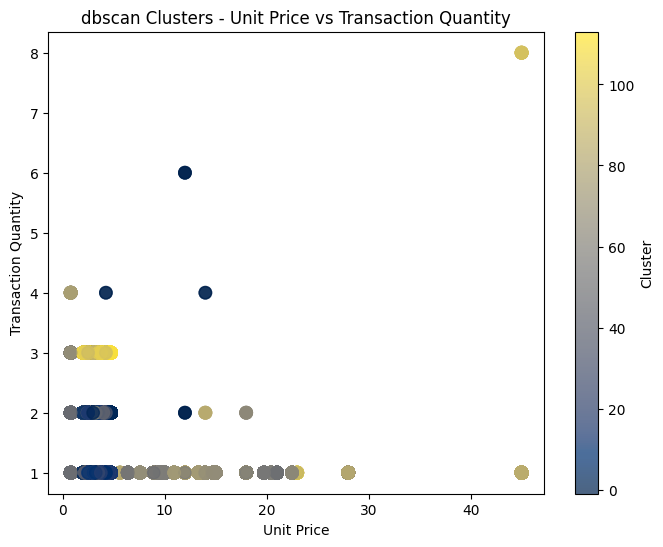

In [13]:
plt.figure(figsize=(8, 6))
# Selecionando duas colunas para plotar: unit_price e transaction_qty
scatter = plt.scatter(
  dataframe["unit_price"], 
  dataframe["transaction_qty"], 
  c=clusters_dsbcan, 
  cmap='cividis', 
  s=80,
  alpha=0.7
)

plt.xlabel('Unit Price')
plt.ylabel('Transaction Quantity')
plt.title('dbscan Clusters - Unit Price vs Transaction Quantity')
plt.colorbar(scatter, label='Cluster')
plt.show()

O dbscan identificou 115 tipo de clusters! Lembrando que o dataset possui um tamanho de 149 mil registros

Lembrando que, n√£o foi feito nem um estudo para a defini√ß√£o do epsilon e do min_samples (At√© o momento).

#### Hier√°rquico Aglomerativo

In [14]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
frac = 0.1

n_samples = int(len(data_scaled) * frac)
random_indices = np.random.choice(len(data_scaled), n_samples, replace=False)
data_sample = data_scaled[random_indices]

agglo_cluster = AgglomerativeClustering(3)
agglo_cluster.fit(data_sample)
agglo_cluster.labels_

array([2, 2, 0, ..., 0, 1, 0])

Eu tive alguns problemas para executar o algoritmo aglomerativo.

1 - Tive que pegar apenas 10% dos dados, pois acontecia um erro de "N√£o foi poss√≠vel alocar 81GB"

2 - Outra abordagem foi tentar convertar de float64 para float32, por√©m, sem sucesso.

In [15]:
# Calculando a matriz de liga√ß√£o (Dendrograma)
#O m√©todo Ward tenta minimizar a vari√¢ncia dentro dos clusters ao fundi-los, 
# sendo √∫til para formar grupos compactos e homog√™neos.
linked = linkage(data_sample, 'ward')

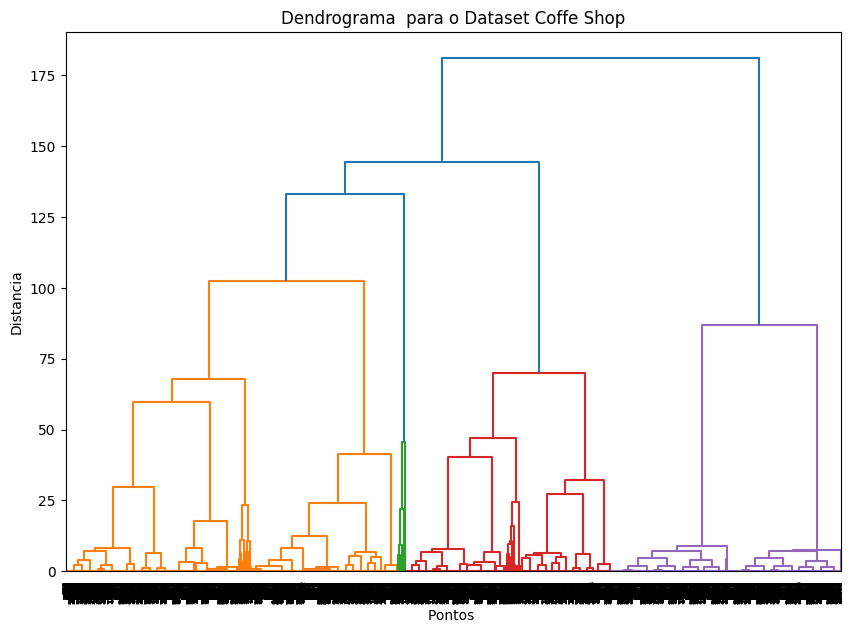

In [16]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("Dendrograma  para o Dataset Coffe Shop")
plt.xlabel("Pontos ")
plt.ylabel("Distancia")
plt.show()

Olhando para o dendrograma atual treinado com 3 clusters, no momento, a melhor divis√£o aparenta ser com 4 grupos.

### Resumo da primeira parte

Utilizando valores sem se preocupar com os hiperpar√¢metros, chegamos a diferentes conclus√µes para cada algoritmo.

Para o KMeans foi utilizado um K = 3, o que n√£o nos diz muita coisa dado que a escolha foi completamente arbitr√°ria.

Para o DBSCAN, o mesmo encontrou um total de 115 grupos com o epsilon de 0.15 e min_samples de 5. Ou seja, com estes par√¢metros temos 115 tipos grupos de transa√ß√µes? Vamos ver se com a otimiza√ß√£o isso ainda faz sentido. 

J√° o hier√°rquico aglomerativo, com o n√∫mero de clusters = 3 (Lembrando que foi utilizado o "ward"), podemos identificar um corte de 4 grupos. Novamente, faz sentido? Temos uma discrep√¢ncia muito grande do dbscan para o aglomerativo. 

Vamos ver se na pr√≥xima parte os algoritmos ir√£o convergir para um ponto comum. 

### M√©tricas que poder√£o ser utilizadas para a avalia√ß√£o dos algoritmos


- M√©todo do Cotovelo (Elbow Method): O ponto onde a in√©rcia para de diminuir significativamente √© o melhor n√∫mero de clusters.
    - Utilizado no KMeans.

- Silhouette Score: Qu√£o bem os pontos est√£o agrupados dentro do cluster versus qu√£o longe est√£o dos outros clusters.
    - Utilizado no KMeans, DBscan e Hier√°rquico.





# Parte 2

Nessa segunda parte do trabalho vamos otimizar os hiperpar√¢metros.

#### Utilizando o "M√©todo do Cotovelo (Elbow Method)" para determinar o melhor valor de K

In [17]:
valores_k = []
inercias = []
for i in range(1, 100):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(data_scaled)
  valores_k.append(i)
  inercias.append(kmeans.inertia_)

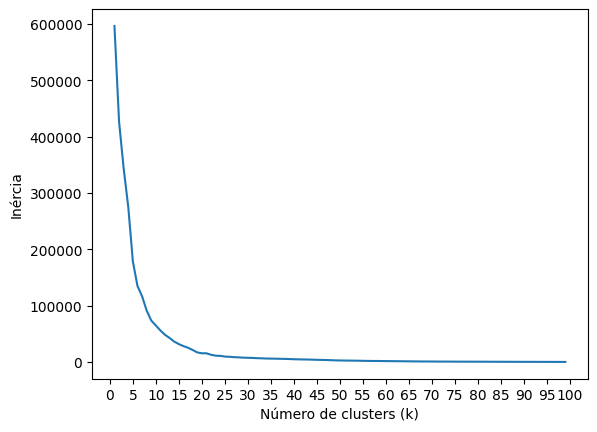

In [18]:
fig, ax = plt.subplots()
ax.plot(valores_k, inercias)
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('In√©rcia')
ax.set_xticks(range(0, max(valores_k) + 5, 5))
plt.show()

A in√©rcia √© a soma das dist√¢ncias quadradas dos pontos at√© o centro do seu cluster. Quanto menor, melhor (em geral), mas com mais clusters a in√©rcia sempre tende a diminuir.

Olhando para o "cotovelo" do gr√°fico, podemos definir o melhor valor de K para algo em torno de 15 e 30.

Vamos testar!

In [19]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(data_scaled)
kmeans.labels_

array([2, 3, 2, ..., 5, 0, 2], dtype=int32)

### N√£o temos os r√≥tulos verdadeiros!

E por conta disso n√£o podemos usar o rand score :(

MAS, temos outra forma de verificar se a quantidade de clusters est√° nos dando bons resultados, a silhouette score!

## KMEANS

## Vamos plotar alguns gr√°ficos para determinar o melhor valor de K

Por conta da demora em executar o c√≥digo, decidi selecionar apenas 10% do dataset, o que equivale a 14911 amostras.

In [20]:
from sklearn.metrics import silhouette_score

#Redimensionando o dataset para 10%
frac = 0.1
n_samples = int(len(data_scaled) * frac)
random_indices_kmeans = np.random.choice(len(data_scaled), n_samples, replace=False)
data_sample_kmeans = data_scaled[random_indices_kmeans]

valores_k = []
silhouette_score_variation = []
# O silhouette score n√£o permite k=1
for i in range(2, 30):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(data_sample_kmeans)
  valores_k.append(i)
  silhouette_score_variation.append(silhouette_score(data_sample_kmeans, kmeans.labels_, metric="euclidean"))



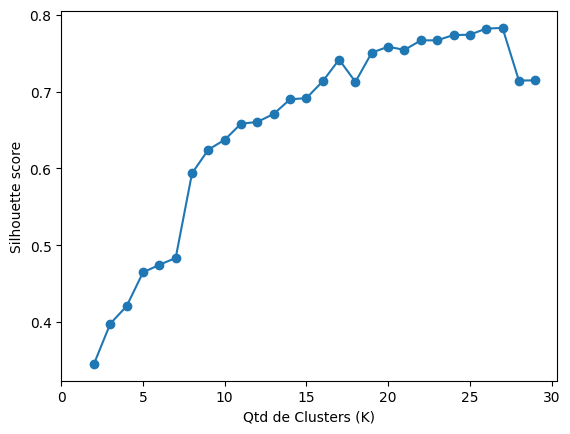

In [21]:
fig, ax = plt.subplots()
ax.plot(valores_k, silhouette_score_variation, marker='o')
plt.ylabel("Silhouette score")
plt.xlabel("Qtd de Clusters (K)")
ax.set_xticks(range(0, max(valores_k) + 5, 5))
plt.show()

Ap√≥s amostra do gr√°fico, encontramos o melhor valor de K, sendo $\approx 25\%$, do qual √© maximizado a Silhouette Score!

Vamos aplicar no c√≥digo!

In [22]:
kmeans = KMeans(n_clusters=25, random_state=0).fit(data_sample_kmeans)
kmeans.labels_

array([ 0,  2,  2, ...,  1,  9, 19], dtype=int32)

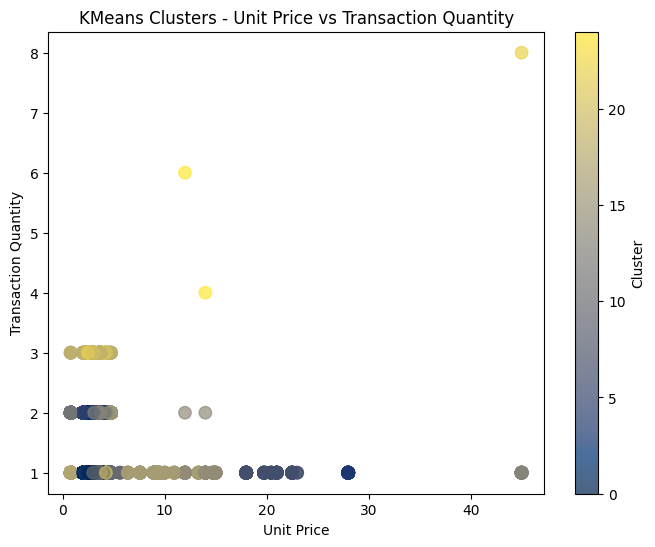

In [23]:
plt.figure(figsize=(8, 6))
# Selecionando duas colunas para plotar: unit_price e transaction_qty
scatter = plt.scatter(
  dataframe.loc[random_indices_kmeans, "unit_price"], 
  dataframe.loc[random_indices_kmeans, "transaction_qty"], 
  c=kmeans.labels_, 
  cmap='cividis', 
  s=80,
  alpha=0.7
)

plt.xlabel('Unit Price')
plt.ylabel('Transaction Quantity')
plt.title('KMeans Clusters - Unit Price vs Transaction Quantity')
plt.colorbar(scatter, label='Cluster')
plt.show()

Vamos verificar quantas transa√ß√µes h√° em cada tipo de cluster

In [24]:
labels = np.array(kmeans.labels_)
unicos, contagens = np.unique(labels, return_counts=True)

print("Contagem por cluster:")
for label, count in zip(unicos, contagens):
    print(f"Cluster {label}: {count} elementos")

Contagem por cluster:
Cluster 0: 2264 elementos
Cluster 1: 1263 elementos
Cluster 2: 2187 elementos
Cluster 3: 33 elementos
Cluster 4: 1213 elementos
Cluster 5: 768 elementos
Cluster 6: 116 elementos
Cluster 7: 777 elementos
Cluster 8: 559 elementos
Cluster 9: 1675 elementos
Cluster 10: 595 elementos
Cluster 11: 353 elementos
Cluster 12: 835 elementos
Cluster 13: 19 elementos
Cluster 14: 82 elementos
Cluster 15: 528 elementos
Cluster 16: 175 elementos
Cluster 17: 302 elementos
Cluster 18: 144 elementos
Cluster 19: 558 elementos
Cluster 20: 45 elementos
Cluster 21: 124 elementos
Cluster 22: 1 elementos
Cluster 23: 293 elementos
Cluster 24: 2 elementos


## DBSCAN

Para maximizar a silhouette score do DBSCAN, vamos criar um range de testes para o epsilon e para o min_samples. 

Vamos tamb√©m criar algumas fun√ß√µes auxiliares.

Para melhor otimiza√ß√£o de tempo, vamos usar 10% dos dados do dataset, o que equivale √† 14911.

In [25]:
def max_dbscan(X, eps_range, min_samples_range):
    best_score = -10
    best_eps = None
    best_samples = None

    # Vamos testar diferentes combina√ß√µes, ou seja, loop dentro de lopp!
    for eps in eps_range:
        for min_sample in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_sample)
            labels_dbscan = dbscan.fit_predict(X)

            #Funcao "set" remove duplicatas
            if(len(set(labels_dbscan)) > 1):
                #S√≥ podemos calcular o silhouete score se tiver mais de um cluster
                score = silhouette_score(X, labels_dbscan)

                if(score > best_score):
                    print(score, eps, min_sample)
                    best_score = score
                    best_eps = eps
                    best_samples = min_sample
    
    return best_score, best_eps, best_samples

#Vamos testar o eps de 0.1, at√© 5.0, de 0.1 em 0.1
eps_range = np.arange(0.5, 2.0, 0.3) 

#Vamos testar a quantidade de samples de 2 at√© 10
min_samples_range = range(3, 6) 

#Redimensionando o dataset para 10%
frac = 0.1
n_samples = int(len(data_scaled) * frac)
random_indices_dbscan = np.random.choice(len(data_scaled), n_samples, replace=False)
data_sample_dbscan = data_scaled[random_indices_dbscan]
print(max_dbscan(data_sample_dbscan, eps_range, min_samples_range))

0.766451287187742 0.5 3
(np.float64(0.766451287187742), np.float64(0.5), 3)


No passo anterior n√£o plotamos o gr√°fico, mas retornamos os melhores valores de cada hiperpar√¢metro!

In [26]:
eps = 0.5 #@param
min_sample = 3 #@param
dbscan = DBSCAN(eps=eps, min_samples=min_sample)
clusters_dsbcan = dbscan.fit_predict(data_sample_dbscan)

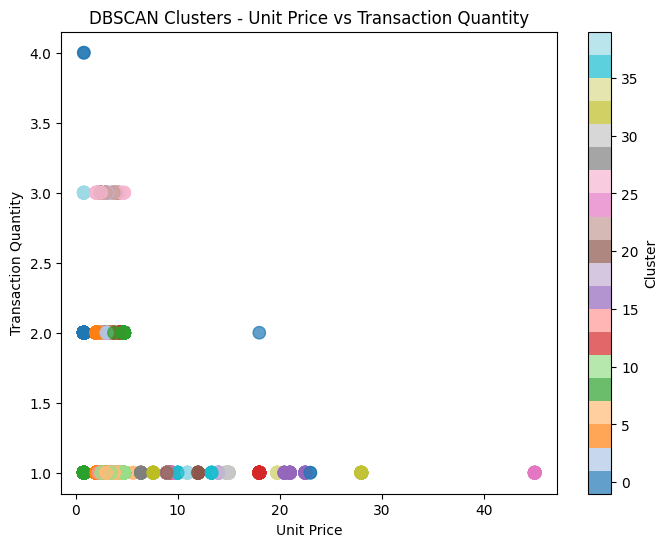

In [27]:
plt.figure(figsize=(8, 6))
# Selecionando duas colunas para plotar: unit_price e transaction_qty
scatter = plt.scatter(
  dataframe.loc[random_indices_dbscan, "unit_price"], 
  dataframe.loc[random_indices_dbscan, "transaction_qty"], 
  c=clusters_dsbcan, 
  cmap='tab20', 
  s=80,
  alpha=0.7
)

plt.xlabel('Unit Price')
plt.ylabel('Transaction Quantity')
plt.title('DBSCAN Clusters - Unit Price vs Transaction Quantity')
plt.colorbar(scatter, label='Cluster')
plt.show()

Atrav√©s dos hiperpar√¢metros encontrados, vemos que o nosso DBSCAN encontrou 40 tipos de categorias de transa√ß√µes, o que √© relativamente maior se comparado com os 25 clusters encontrados no KMeans.

Vamos verificar quantas transa√ß√µes h√° em cada tipo de cluster

In [28]:
labels = np.array(clusters_dsbcan)
unicos, contagens = np.unique(labels, return_counts=True)

print("Contagem por cluster:")
for label, count in zip(unicos, contagens):
    print(f"Cluster {label}: {count} elementos")

Contagem por cluster:
Cluster -1: 5 elementos
Cluster 0: 366 elementos
Cluster 1: 35 elementos
Cluster 2: 2169 elementos
Cluster 3: 1229 elementos
Cluster 4: 1230 elementos
Cluster 5: 825 elementos
Cluster 6: 1650 elementos
Cluster 7: 549 elementos
Cluster 8: 335 elementos
Cluster 9: 588 elementos
Cluster 10: 2307 elementos
Cluster 11: 48 elementos
Cluster 12: 698 elementos
Cluster 13: 829 elementos
Cluster 14: 769 elementos
Cluster 15: 21 elementos
Cluster 16: 34 elementos
Cluster 17: 573 elementos
Cluster 18: 29 elementos
Cluster 19: 41 elementos
Cluster 20: 19 elementos
Cluster 21: 48 elementos
Cluster 22: 135 elementos
Cluster 23: 16 elementos
Cluster 24: 36 elementos
Cluster 25: 21 elementos
Cluster 26: 78 elementos
Cluster 27: 35 elementos
Cluster 28: 14 elementos
Cluster 29: 38 elementos
Cluster 30: 31 elementos
Cluster 31: 19 elementos
Cluster 32: 17 elementos
Cluster 33: 14 elementos
Cluster 34: 3 elementos
Cluster 35: 11 elementos
Cluster 36: 14 elementos
Cluster 37: 12 eleme

Como podemos ver, h√° clusters setados como -1, ou seja, s√£o nossos outliers!

## Hierarquico Aglomerativo

De forma semelhante, vamos tamb√©m reduzir o volume dos dados para 10%.

Lembrando que mesmo na Parte 1 n√£o foi poss√≠vel executar o respectivo algoritmo com todos os dados.

In [29]:
frac = 0.1

n_samples = int(len(data_scaled) * frac)
random_indices = np.random.choice(len(data_scaled), n_samples, replace=False)
data_sample_agglo = data_scaled[random_indices]

valores_k_agglo = []
silhouette_score_variation_agglo = []
# O silhouette score n√£o permite k=1
for i in range(2, 50):
  agglo_cluster = AgglomerativeClustering(i).fit(data_sample_agglo)
  valores_k_agglo.append(i)
  silhouette_score_variation_agglo.append(
    silhouette_score(data_sample_agglo, agglo_cluster.labels_, metric="euclidean")
  )

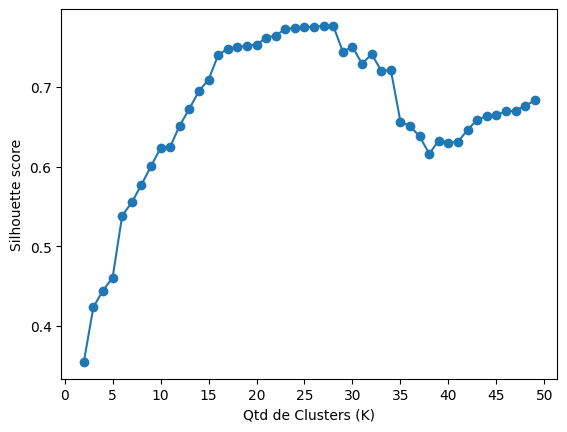

In [30]:
fig, ax = plt.subplots()
ax.plot(valores_k_agglo, silhouette_score_variation_agglo, marker='o')
plt.ylabel("Silhouette score")
plt.xlabel("Qtd de Clusters (K)")
ax.set_xticks(range(0, max(valores_k_agglo) + 5, 5))
plt.show()

Como podemos ver atrav√©s do gr√°fico da Silhouette Score para o Hier√°rquivo Aglomerativo, o melhor valor para o cluster √© $\approx 25\%$!

Vamos aplicar no c√≥digo.

In [31]:
agglo_cluster = AgglomerativeClustering(25)
agglo_cluster.fit(data_sample_agglo)
agglo_cluster.labels_

array([13, 17, 11, ...,  9,  2,  9])

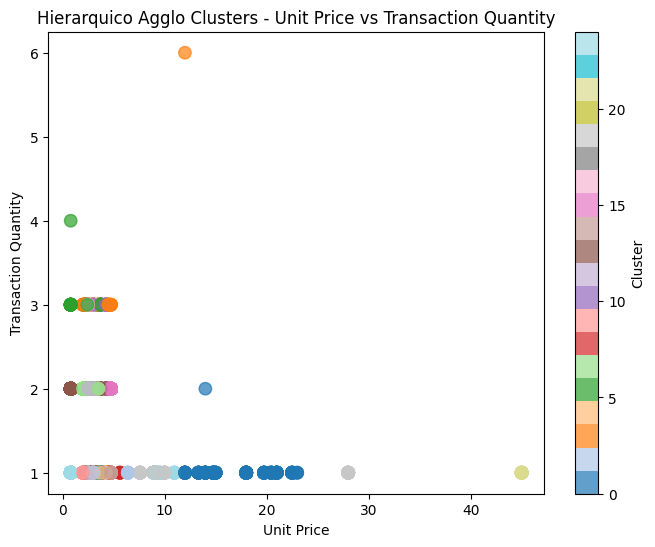

In [32]:
plt.figure(figsize=(8, 6))
# Selecionando duas colunas para plotar: unit_price e transaction_qty
scatter = plt.scatter(
  dataframe.loc[random_indices, "unit_price"], 
  dataframe.loc[random_indices, "transaction_qty"], 
  c=agglo_cluster.labels_, 
  cmap='tab20', 
  s=80,
  alpha=0.7
)

plt.xlabel('Unit Price')
plt.ylabel('Transaction Quantity')
plt.title('Hierarquico Agglo Clusters - Unit Price vs Transaction Quantity')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [33]:
labels = np.array(agglo_cluster.labels_)
unicos, contagens = np.unique(labels, return_counts=True)

print("Contagem por cluster:")
for label, count in zip(unicos, contagens):
    print(f"Cluster {label}: {count} elementos")

Contagem por cluster:
Cluster 0: 93 elementos
Cluster 1: 107 elementos
Cluster 2: 2232 elementos
Cluster 3: 93 elementos
Cluster 4: 822 elementos
Cluster 5: 64 elementos
Cluster 6: 1192 elementos
Cluster 7: 867 elementos
Cluster 8: 948 elementos
Cluster 9: 1290 elementos
Cluster 10: 45 elementos
Cluster 11: 2170 elementos
Cluster 12: 758 elementos
Cluster 13: 313 elementos
Cluster 14: 584 elementos
Cluster 15: 603 elementos
Cluster 16: 120 elementos
Cluster 17: 843 elementos
Cluster 18: 91 elementos
Cluster 19: 21 elementos
Cluster 20: 581 elementos
Cluster 21: 15 elementos
Cluster 22: 693 elementos
Cluster 23: 309 elementos
Cluster 24: 57 elementos


Vamos ent√£o visualizar o Dendrograma!

In [34]:
linked = linkage(data_sample_agglo, 'ward')

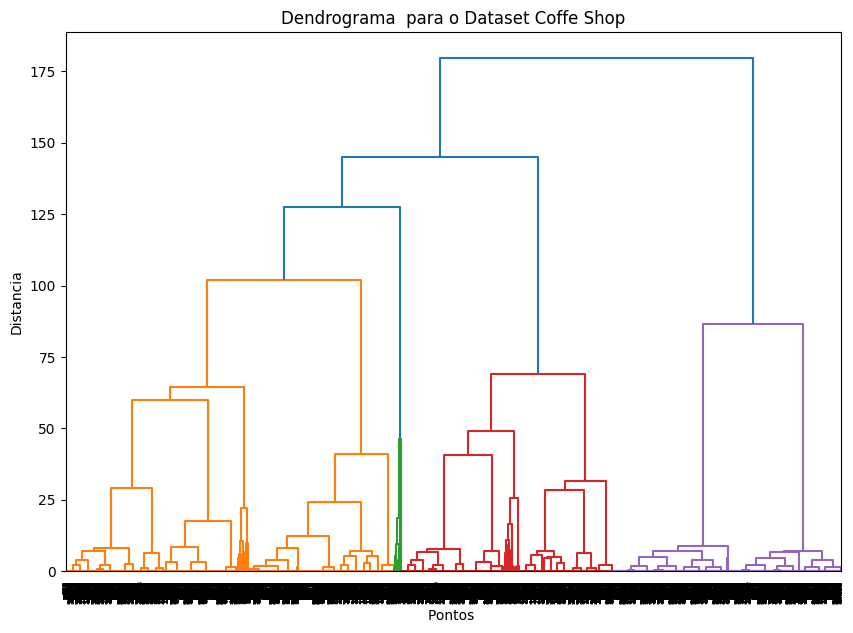

In [35]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("Dendrograma  para o Dataset Coffe Shop")
plt.xlabel("Pontos ")
plt.ylabel("Distancia")
# plt.axhline(y=60, color='r', linestyle='--')
plt.show()

### Diferen√ßas do Dendrograma para o Silhouette Score!

Depois da sele√ß√£o dos hiperpar√¢metro do Hier√°rquico Aglomerativo, chegamos na melhor configura√ß√£o de ‚âà25 clusters, enquanto se olharmos para o dendrograma, veremos que o melhor corte pode ser feito em ‚âà60, o que nos daria cerca de 4 clusters!

Mas porque essa diferen√ßa?

A silhouette score sempre tenta nos dar a melhor separa√ß√£o dos grupos com base matematica, enquanto o dendrograma exige uma intertepreta√ß√£o!

Ent√£o qual o melhor? DEPENDE!

Tudo depende do problema que estamos tentando lidar.

Neste exemplo, caso o dono das cafeterias queira maximizar a categoria de clientes e para isso, criar promo√ß√µes para os respectivos grupos, usar√° a informa√ß√£o do Hier√°rquico Aglomerativo, ou caso ele queira criar poucas promo√ß√µes para um pequeno grupo de clientes (lembrando, com base nas transa√ß√µes), pode usar o dendrograma!

## KMeans x DBSCAn x Hier√°rquico Aglomerativo/Dendrograma

O KMeans encontrou ~=25 grupos de transa√ß√µes, o DBSCAN 40 e o hierarquico tamb√©m 25.

Olhando para o Dendrograma, dividmos em cerca de 4 clusters!

Mas eai, qual escolher?

Como o nosso problema n√£o √© rotulado, os algoritmos servem de guia para o problema de neg√≥cio!

Conforme dito na sess√£o anterior, tudo depende do que estamos tentando lidar, de qual problema estamos tentando resolver!

Nestes exemplos usamos apenas as colunas: ["product_category", "product_type", "unit_price", "transaction_qty"]



# Usando todos os dados do dataframe!

Nos exemplos anteriores, para fins de otimiza√ß√£o, foi usado apenas 4 colunas, pois est√°vamos tentando encontrar uma divis√£o das transa√ß√µes!

E se formos usar todo o dataframe? Para isso, precisamos reduzir a dimensionalidade do algoritmo de forma eficaz!


### üö®üö® Lembrando: Estamos trabalhando com dados n√£o rotulados, que n√£o possuem alvo! Ou seja, todo o conte√∫do a seguir √© para fins de entendimento do dataset! üö®üö®

Na parte anterior, escolhemos 4 tabelas para tentar identificar os padr√µes das transa√ß√µes, dado as features selecionadas!

Nos exemplos a seguir, como n√£o temos uma coluna rotulada (ou seja, um alvo claro), imagine que voc√™ √© o gestor das cafeterias e quer entender melhor os dados que possui (e futuramente, o que fazer com eles).

## PCA

Vamos olhar novamente para o nosso dataframe

In [36]:
dataframe.head()

transaction_id    transaction_time  transaction_qty  store_id  \
0               1 1900-01-01 07:06:11                2         5   
1               2 1900-01-01 07:08:56                2         5   
2               3 1900-01-01 07:14:04                2         5   
3               4 1900-01-01 07:20:24                1         5   
4               5 1900-01-01 07:22:41                2         5   

   store_location  product_id  unit_price  product_category  product_type  \
0               2          32         3.0                 2            13   
1               2          57         3.1                 8             4   
2               2          59         4.5                 4            17   
3               2          22         2.0                 2            10   
4               2          57         3.1                 8             4   

   product_detail  Year  Month  Day  hour  sin_hour  cos_hour  
0              32  2023      1    1     7  0.965926 -0.258819  
1              71  2023      1    1     7  0.965926 -0.258819  
2              20  2023      1    1     7  0.965926 -0.258819  
3              60  2023      1    1     7  0.965926 -0.258819  
4              71  2023      1    1     7  0.965926 -0.258819

In [37]:
# Lembrando que tem mais colunas do que o original devido ao tratamento dos dados
dataframe.shape

(149116, 16)

Na parte 1 foi tratado os dados, por√©m, como escolhemos a dedo as colunas para se trabalhar at√© ent√£o, n√£o foi necess√°rios remove-los.

Vamos remover as colunas auxiliares: transaction_time e hour

In [38]:
dataframe.drop(columns=["transaction_time", "hour"], inplace=True)

E vamos padronizar todos os dados!

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataframe)

Primeiro, vamos executar o PCA sem definir o n√∫mero de componentes.

In [40]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)
pca.explained_variance_ratio_

array([0.15332327, 0.14305266, 0.11520596, 0.09294398, 0.08985828,
       0.08254102, 0.07766697, 0.06018772, 0.0574506 , 0.04901031,
       0.04373996, 0.03418661, 0.00083265, 0.        ])

Vamos somar os X primeiros elementos do PCA.

In [41]:
print(sum(pca.explained_variance_ratio_[:7]))

0.7545921455919821


Mas a partir de que ponto o ganho de dados √© quase nulo? Vamos olhar o gr√°fico!

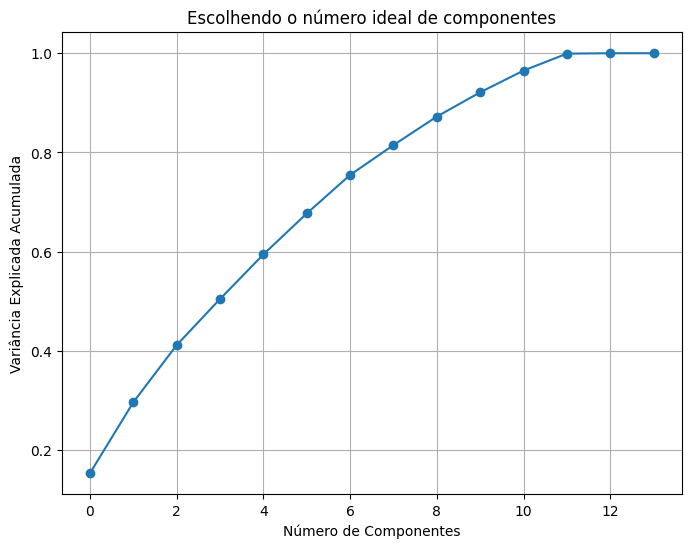

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('N√∫mero de Componentes')
plt.ylabel('Vari√¢ncia Explicada Acumulada')
plt.title('Escolhendo o n√∫mero ideal de componentes')
plt.grid(True)
plt.show()

Olhando para o gr√°fico, vemos que a partir de ‚âà10 componentes o ganho √© quase nulo, mas isso n√£o nos ajuda em nada!

O objetivo √© reduzir o n√∫mero de componentes para uma melhor otimiza√ß√£o, ent√£o, vamos aceitar uma explica√ß√£o dos dados de 80%, o que nos d√° aproximadamente 7 componentes!

In [43]:
pca = PCA(n_components=7)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Vamos tamb√©m utilizar o kmeans para extrair as labels (Levando em considera√ß√£o a quantidade de clusters da parte anterior, 25)

In [44]:
# kmeans = KMeans(n_clusters=25, random_state=0).fit(X_pca)
kmeans = KMeans(n_clusters=25, random_state=0).fit(X_scaled) # Outra forma de visualizar
kmeans.labels_

array([10,  1, 10, ..., 12, 24, 24], dtype=int32)

Aplicar o kmeans em cima do X_scaled ou X_pca? Tudo depende do qu√£o grande s√£o seus dados!

Como o kmeans se saiu bem em cima do X_scaled, vamos aplicar em cima dele.

Junto com o PCA e o KMEANS, vamos plotar os gr√°ficos!

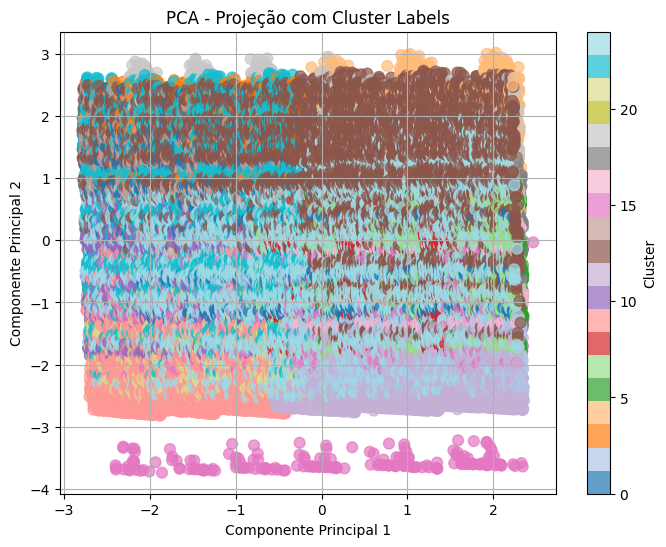

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='tab20', s=60, alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Proje√ß√£o com Cluster Labels')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

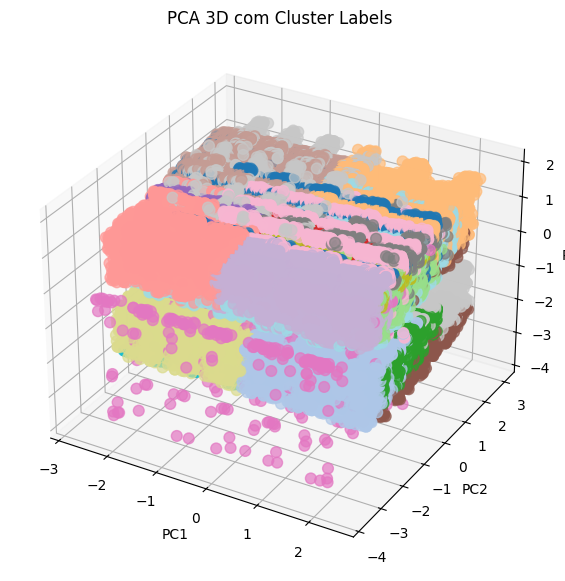

In [46]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='tab20', s=60, alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA 3D com Cluster Labels')
plt.show()

Um caos?! Talvez? E se diminuirmos a quantidade de clusters no kmeans?

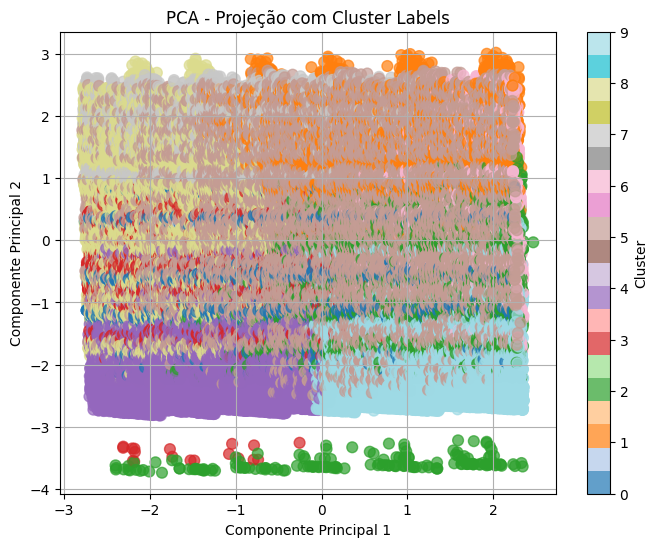

In [47]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_scaled)
kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='tab20', s=60, alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Proje√ß√£o com Cluster Labels')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


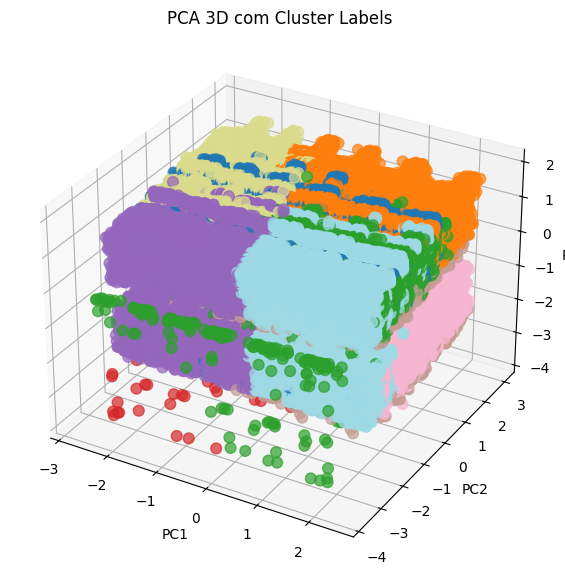

In [48]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='tab20', s=60, alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA 3D com Cluster Labels')
plt.show()

# TSNE

O TSNE demanda muito poder computacional, ent√£o semelhante ao que foi feito anteriormente, vamos trabalhar com apenas 10% dos dados!

In [49]:
from sklearn.manifold import TSNE
frac = 0.1
n_samples = int(len(data_scaled) * frac)
random_indices_tsne = np.random.choice(len(X_scaled), n_samples, replace=False)
data_sample_tsne = X_scaled[random_indices_tsne]

tsne = TSNE(n_components=2, random_state=42, init="random")
X_tsne = tsne.fit_transform(data_sample_tsne)

Vamos tamb√©m utilizar o kmeans para determinar as labels.

In [50]:
kmeans = KMeans(n_clusters=25, random_state=0).fit(X_scaled)

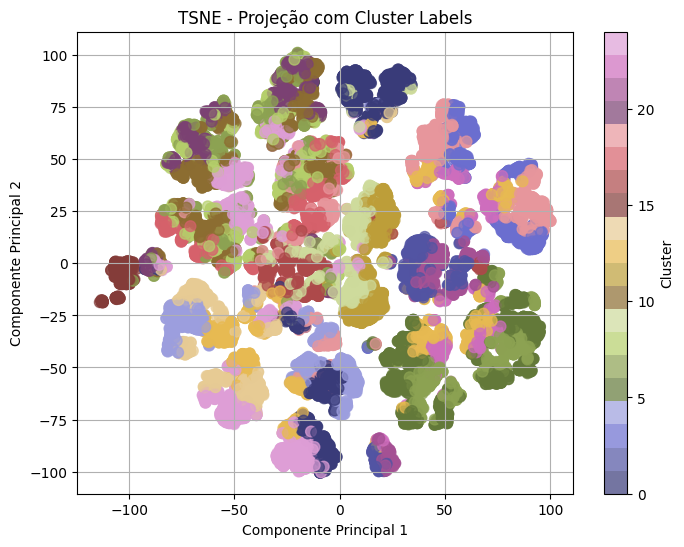

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_[random_indices_tsne], cmap='tab20b', s=60, alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('TSNE - Proje√ß√£o com Cluster Labels')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Vamos utilizar o seaborn para uma visualiza√ß√£o diferente do gr√°fico!

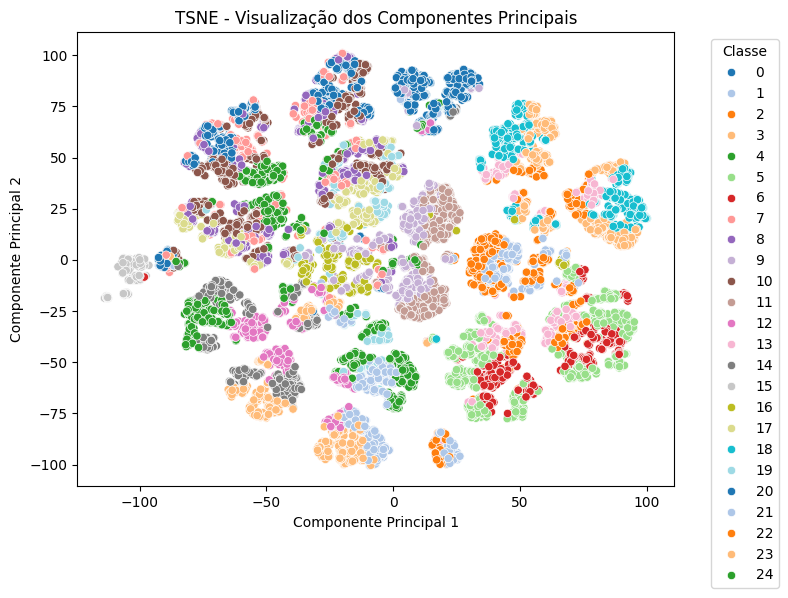

In [52]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans.labels_[random_indices_tsne], palette='tab20')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('TSNE - Visualiza√ß√£o dos Componentes Principais')
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

E se reduzirmos o K para 10 clusters?

In [53]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_scaled)

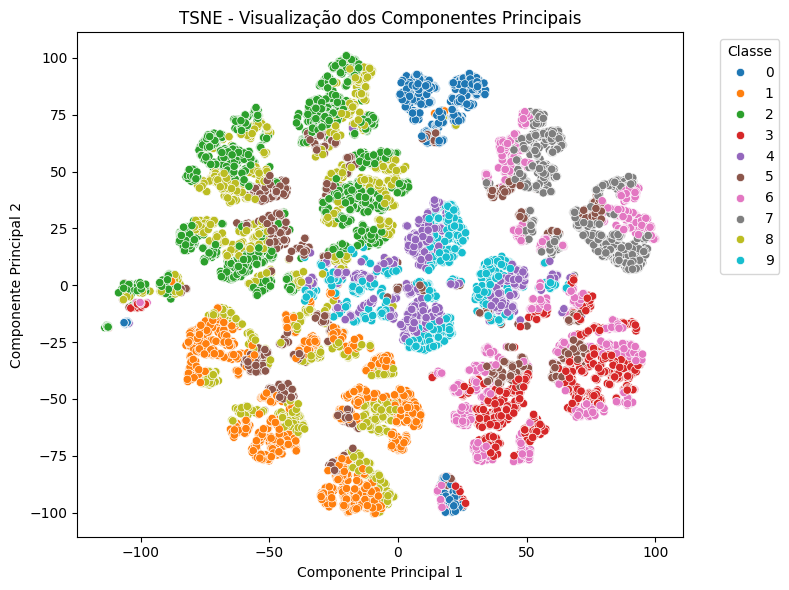

In [54]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans.labels_[random_indices_tsne], palette='tab10')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('TSNE - Visualiza√ß√£o dos Componentes Principais')
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Temos ent√£o que o PCA consegue reduzir uma grande quantidade de dados, dado o n√∫mero de componentes desejados.

O TSNE faz o mesmo, por√©m, o mesmo demanda um alto poder computacional, e por conta disso, precisou ser selecionado apenas uma amostra dos dados (10% de 149 mil).

Ao utilizar o kmeans para capturar as labels junto com os algoritmos de redu√ß√£o de dimensionalidade, temos uma vis√£o mais completa da clusteriza√ß√£o do dataframe, dado o conjunto inteiro (e n√£o somente 4 colunas escolhidas).

Dessa forma, temos uma resposta mais visual de como podemos dividir o nosso conjunto de dados para poder responder as quest√µes de neg√≥cio que possam vir a acontecer.

### Tudo depende do problema!

Vemos que a melhor configura√ß√£o para o kmeans, o que maximiza a silhouette score √© ‚âà25, por√©m, para fins de compreens√£o de divis√£o dos dados, testamos tamb√©m com k=10, para uma melhor visualiza√ß√£o nos gr√°ficos.

Isso est√° errado? N√£o!

Est√° correto? Depende!

A regra de neg√≥cio √© a primeira coisa que devemos analisar quando trabalhamos com clusteriza√ß√£o, ainda mais quando n√£o se tem os r√≥tulos dos dados!